# Fundamentos: Resolver la ecuación de Poisson
El objetivo de este capítulo es mostrar cómo la ecuación de Poisson, la más básica de todas las EDPs (Ecuaciones Diferenciales Parciales), puede resolverse rápidamente con unas pocas líneas de código FEniCS. Presentamos los objetos más fundamentales de FEniCS como Mesh, Function, FunctionSpace, TrialFunction, y TestFunction, y aprendemos a escribir un solucionador básico de EDP, incluyendo cómo formular el problema de variación matemática, aplicar condiciones de contorno, llamar al solucionador de FEniCS, y trazar la solución.

## Formulación de problemas matemáticos
Muchos libros sobre lenguajes de programación comienzan con un programa "¡Hola Mundo!". Los lectores tienen curiosidad por saber cómo se expresan las tareas fundamentales en el idioma, y la impresión de un texto en la pantalla puede ser una tarea de este tipo. En el mundo de los métodos de elementos finitos para los EDPs, la tarea más fundamental debe ser resolver la ecuación de Poisson. Nuestra contraparte del clásico programa "¡Hola Mundo!" resuelve, por lo tanto, el siguiente problema de valor límite:

$$
\begin{alignat}{2}
- \nabla^2 u(x) &= f(x),\quad &&x\mbox{ en } \Omega,
\tag{2.1}\\ 
u(x) &= u_D(x),\quad &&x\mbox{ on } \partial \Omega \tag{2.2}
\end{alignat}
$$

Aquí, $u=u(x)$ es la función desconocida, $f=f(x)$ es una función prescrita, $∇^2$ es el operador Laplace (a menudo escrito como $Δ$), $Ω$ es el dominio espacial, y $∂Ω$ es contorno de $Ω$. El problema de Poisson, incluyendo tanto el EDP $-∇^2u=f$ como la condición de límite $u=u_D$ en $∂Ω$, es un ejemplo de un problema de valor límite, el cual debe ser establecido con precisión antes de que tenga sentido comenzar a resolverlo con FEniCS.

En dos dimensiones espaciales con coordenadas $x$ e $y$, podemos escribir la ecuación de Poisson como:

$$
\begin{equation}
- {\partial^2 u\over\partial x^2} -
{\partial^2 u\over\partial y^2} = f(x,y)
\tag{2.3}
\end{equation}
$$

La $u$ desconocida es ahora una función de dos variables, $u=u(x,y)$, definidas sobre un dominio bidimensional $Ω$

La ecuación de Poisson surge en numerosos contextos físicos, incluyendo la conducción de calor, electrostática, difusión de sustancias, torsión de barras elásticas, flujo de fluidos invisibles y ondas de agua. Además, la ecuación aparece en estrategias de sub-división numérica para sistemas más complicados de EDPs, en particular las ecuaciones de Navier-Stokes.

Resolver un problema de valor límite, como la ecuación de Poisson, en FEniCS consiste en los siguientes pasos:

1. Identificar el dominio computacional ($Ω$), el EDP, sus condiciones límite y los términos fuente ($f$).
2. Reformular el EDP como un problema variacional de elementos finitos.
3. Escribir un programa en Python que defina el dominio computacional, el problema variacional, las condiciones de contorno y los términos fuente, utilizando las correspondientes abstracciones de FEniCS.
4. Llamar a FEniCS para resolver el problema de valor límite y, opcionalmente, ampliar el programa para calcular cantidades derivadas, tales como flujos y promedios, y visualizar los resultados.

Ahora pasaremos a los pasos 2 a 4 en detalle. La característica clave de FEniCS es que los pasos 3 y 4 dan como resultado un código bastante corto, mientras que un programa similar, en la mayor parte de las estructuras de software para la solución de EDPs, requiere mucho más código y programación técnicamente difícil.


<div class="alert alert-block alert-success">
<b>¿Qué hace que FEniCS sea atractivo?</b>. Aunque muchas estructuras de software tienen un ejemplo realmente elegante de "Hola Mundo" para la ecuación de Poisson, FEniCS es, a nuestro entender, la única en la que el código permanece compacto y agradable, muy cercano a la formulación matemática, incluso cuando la complejidad matemática y algorítmica aumenta y cuando se pasa de un ordenador portátil a un servidor de cálculo de alto rendimiento (cluster).
</div>

## Formulación variacional por elementos finitos

FEniCS se basa en el método de elementos finitos, que es una maquinaria matemática general y eficiente para la solución numérica de EDPs. El punto de partida para los métodos de elementos finitos es una EDP expresada en forma variacional. Los lectores que no estén familiarizados con los problemas variacionales recibirán una breve introducción al tema en este tutorial, pero se recomienda leer un libro adecuado sobre el método de elementos finitos. La sección "El método de elementos finitos" contiene una lista de libros recomendados. La experiencia demuestra que usted puede trabajar con FEniCS como una herramienta para resolver EDPs incluso sin un conocimiento profundo del método de elementos finitos, siempre y cuando consiga a alguien que le ayude a formular la EDP como un problema variacional.

La receta básica para convertir una EDP en un problema variacional es multiplicar la EDP por una función $v$, integrar la ecuación resultante sobre el dominio $Ω$, y realizar la integración por partes de términos con derivadas de segundo orden. La función $v$ que multiplica la EDP se denomina función de prueba ("test"). La función desconocida $u$ a aproximar se denomina función de ensayo ("trial"). Los términos funciones de prueba y ensayo también se utilizan en los programas FEniCS. Las funciones de ensayo ("trial") pertenecen a ciertos espacios de función que especifican las propiedades de las funciones.

En el presente caso, primero multiplicamos la ecuación de Poisson por la función de prueba $v$ e integramos sobre $Ω$

$$
\begin{equation}
\tag{2.4}
 -\int_\Omega (\nabla^2 u)v dx = \int_\Omega fv dx \end{equation}
$$

Aquí dejamos que $dx$ denote el elemento diferencial para la integración sobre el dominio $Ω$. Más tarde dejaremos que $ds$ denote el elemento diferencial para la integración sobre el límite de $Ω$.

Una regla común cuando derivamos formulaciones variacionales es que tratamos de mantener el orden de los derivados de u y v lo más pequeño posible. Aquí tenemos una derivada espacial de segundo orden de u, que puede transformarse en una derivada de u y v aplicando la técnica de integración por partes. La fórmula dice:

$$
\begin{equation}
\tag{2.5}
 -\int_\Omega (\nabla^2 u)v dx
= \int_\Omega\nabla u\cdot\nabla v dx - \int_{\partial\Omega}{\partial u\over
\partial n}v ds ,
\end{equation}
$$

Donde ${{\partial u\over\partial n}}=∇u⋅n$ es la derivada de u en la dirección normal hacia afuera $n$ en el límite.

Otra característica de las formulaciones variacionales es que se requiere que la función de prueba $v$ desaparezca en las partes del límite donde se conoce la solución $u$ (el libro[14] explica en detalle por qué es necesario este requisito). En el problema actual, esto significa que $v=0$ en toda la frontera $∂Ω$. Por lo tanto, el segundo término a la derecha de (2.5) desaparece. De los puntos (2.4) y (2.5) se deduce que:

$$
\begin{equation}
\int_\Omega\nabla u\cdot\nabla v dx = \int_\Omega fv dx
\tag{2.6}
\end{equation}
$$

Si requerimos que esta ecuación se aplique a todas las funciones de prueba v en algún espacio adecuado $\hat{V}$, el llamado espacio de prueba, obtenemos un problema matemático bien definido que determina de manera única la solución $u$ que se encuentra en alguna función (posiblemente diferente) del espacio $V$, el llamado espacio de ensayo. Nos referimos a (2.6) como la forma débil o forma variacional del problema original del valor límite (2.1)--(2.2).

La declaración correcta de nuestro problema variacional es la siguiente: encuentre $u∈V$ tal que:

$$
\begin{equation} \tag{2.7}
  \int_{\Omega} \nabla u \cdot \nabla v dx =
  \int_{\Omega} fv dx
  \quad \forall v \in \hat{V}
\end{equation}
$$

Los espacios de ensayo y de prueba $V$ y $\hat{V}$ están definidos en el problema actual como:

$$
\begin{align*}
     V      &= \{v \in H^1(\Omega) : v = u_D \mbox{ on } \partial\Omega\}, \\ 
    \hat{V} &= \{v \in H^1(\Omega) : v = 0 \mbox{ on } \partial\Omega\}
\end{align*}
$$

En resumen, $H^1(Ω)$ es el espacio matemáticamente conocido de Sobolev que contiene funciones $v$ tales que $v^2$ y $|∇v|^2$ tienen integrales finitas sobre $Ω$ (lo esencialmente significa que las funciones son continuas). La solución de la EDP subyacente debe estar en un espacio de funciones donde las derivadas también son continuas, pero el espacio de Sobolev $H^1(Ω)$ permite funciones con derivadas discontinuas. Este requisito de continuidad más débil de $u$ en la declaración variacional (2.7), como resultado de la integración por partes, tiene grandes consecuencias prácticas cuando se trata de construir espacios funcionales de elementos finitos. En particular, permite el uso de espacios de función polinomiales parciales; es decir, espacios de función construidos cosiendo funciones polinomiales en dominios simples como intervalos, triángulos o tetraedros.

El problema variacional (2.7) es un *problema continuo*: define la solución $u$ en el espacio funcional infinito-dimensional $V$. El método de elementos finitos para la ecuación de Poisson encuentra una solución aproximada del problema variacional (2.7) reemplazando los espacios funcionales infinito-dimensionales $V$ y $\hat{V}$ por espacios de ensayo y prueba discretos (finito-dimensionales) $V_h⊂V$ y $\hat{V_h}⊂\hat{V}$. El problema variacional discreto es el siguiente: $u_h∈Vh⊂V$, tal que:

$$
\begin{equation} \tag{2.8}
  \int_{\Omega} \nabla u_h \cdot \nabla v dx =
  \int_{\Omega} fv dx
  \quad \forall v \in \hat{V}_h \subset \hat{V}
\end{equation}
$$

Este problema variacional, junto con una definición adecuada de los espacios de función $V_h$ y $\hat{V_h}$, definen de manera única nuestra solución numérica aproximada de la ecuación de Poisson (2.1). Tenga en cuenta que las condiciones de contorno se codifican como parte de los espacios de ensayo y prueba. El marco matemático puede parecer complicado a primera vista, pero la buena noticia es que el problema variacional de elementos finitos (2.8) se ve igual que el problema variacional continuo (2.7), y ¡FEniCS puede resolver automáticamente problemas variacionales como (2.8)!

<div class="alert alert alert-block alert-danger">
<b>Lo que queremos decir con la notación u y V</b>. La literatura matemática sobre problemas variacionales escribe $u_h$ para la solución del problema discreto y $u$ para la solución del problema continuo. Para (casi) obtener una relación uno a uno entre la formulación matemática de un problema y el programa FEniCS correspondiente, dejaremos el subíndice $h$ y usaremos $u$ para la solución del problema discreto. Utilizaremos $u_e$ para la solución exacta del problema continuo, si necesitamos distinguir explícitamente entre los dos. Del mismo modo, dejaremos que $V$ denote el espacio funcional de elementos finitos discretos en el que buscamos nuestra solución.
</div>

## Abstracción de la formulación variacional por elementos finitos
Resulta conveniente introducir la siguiente notación canónica para problemas variacionales: encontrar $u∈V$ tal que:

$$
\begin{equation}
a(u, v) = L(v) \quad \forall v \in \hat{V}.
\tag{2.9}
\end{equation}
$$

Para la ecuación de Poisson, tenemos:

$$
\begin{align}
a(u, v) &= \int_{\Omega} \nabla u \cdot \nabla v dx,
\tag{2.10}\\ 
L(v) &= \int_{\Omega} fv dx  \tag{2.11}
\end{align}
$$

De la literatura matemática, $a(u,v)$ se conoce como una forma bilineal y $L(v)$ como una forma lineal. En cada problema lineal que resolvamos, identificaremos los términos con la $u$ desconocida y los recopilaremos en $a(u,v)$, y de manera similar recopilaremos todos los términos con sólo funciones conocidas en $L(v)$. Las fórmulas para $a$ y $L$ se pueden expresar directamente en nuestros programas FEniCS.

Para resolver un EDP lineal en FEniCS, como la ecuación de Poisson, el usuario sólo necesita realizar dos pasos:

- Elija los espacios de elementos finitos $V$ y $\hat{V}$ especificando el dominio (la malla) y el tipo de espacio de función (grado y tipo de polinomio).
- Exprese la EDP como un problema variacional (discreto): encuentre $u∈V$ tal que $a(u,v)=L(v)$ para todos $v∈\hat{V}$.

## Elección de un problema de prueba
El problema de Poisson (2.1)--(2.2) ha presentado hasta ahora un dominio general $Ω$ y funciones generales $u_D$ para las condiciones de contorno y $f$ para el lado derecho. Para nuestra primera implementación necesitaremos hacer elecciones específicas para $Ω$, $u_D$, y $f$. Será prudente construir un problema con una solución analítica conocida para que podamos comprobar fácilmente que la solución calculada es correcta. Las soluciones que son polinomios de bajo orden son candidatos primarios. Los espacios de función de elementos finitos estándar de grado $r$ reproducirán exactamente los polinomios de grado $r$. Y los elementos lineales por partes $(r=1)$ son capaces de reproducir exactamente un polinomio cuadrático en una malla uniformemente dividida. Este importante resultado puede ser utilizado para verificar nuestra implementación. Sólo fabricamos alguna función cuadrática en 2D como la solución exacta, por ejemplo:

$$
\begin{equation}
\tag{2.12}
u_e (x,y) = 1 +x^2 + 2y^2
\end{equation}
$$

Insertando (2.12) en la ecuación de Poisson (2.1), encontramos que $u_e(x,y)$ es una solución si:

$$
f(x,y) = -6,\quad u_D(x,y)=u_e(x,y)=1 + x^2 + 2y^2,
$$

independientemente de la forma del dominio, siempre y cuando se prescriba $u_e$ a lo largo del límite. Elegimos aquí, por simplicidad, el dominio para ser la unidad cuadrada,

$$
\Omega = [0,1]\times [0,1] 
$$

Este método simple, pero muy poderoso, para construir problemas de prueba se llama el *método de las soluciones fabricadas*: escoge una expresión simple para la solución exacta, conéctala en la ecuación para obtener el lado derecho (término fuente $f$), luego resuelve la ecuación con este lado derecho y usando la solución exacta como una condición de límite, y trata de reproducir la solución exacta.


<div class="alert alert alert-block alert-success">
<b>Consejo: ¡Intente verificar su código con soluciones numéricas exactas!</b>. Un enfoque común para probar la implementación de un método numérico es comparar la solución numérica con una solución analítica exacta del problema de prueba y concluir que el programa funciona si el error es "suficientemente pequeño". Desafortunadamente, es imposible decir si un error de tamaño 10-5 en una malla de 20×20 de elementos lineales tiene la (in)precisión esperada de la aproximación numérica o si el error también contiene el efecto de un error en el código. Todo lo que sabemos sobre el error numérico son sus <i>propiedades asintóticas</i>, por ejemplo que es proporcional a $h^2$ si $h$ es el tamaño de una celda en la malla. Luego, comparamos el error en las mallas con diferentes valores de $h$ para ver si el comportamiento asintótico es correcto. Esta es una técnica de verificación muy poderosa y se explica en detalle en la sección <b>Cálculo de los tipos de convergencia</b>. Sin embargo, si tenemos un problema de prueba para el cual sabemos que no debería haber errores de aproximación, sabemos que la solución analítica del problema del PDE debería ser reproducida a precisión de máquina por el programa. Es por eso que enfatizamos este tipo de problemas de pruebas a lo largo de este tutorial. Típicamente, los elementos de grado $r$ pueden reproducir exactamente los polinomios de grado $r$, por lo que este es el punto de partida para construir una solución sin errores de aproximación numérica.
</div>

# Implementación de FEniCS
## El programa completo
Un programa FEniCS para resolver nuestro problema de prueba para la ecuación de Poisson en 2D con las opciones dadas de $Ω$, $u_D$, y $f$ puede verse como sigue:

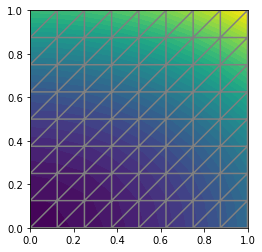

error_L2  = 0.00823509807335485
error_max = 1.3322676295501878e-15


In [3]:
from fenics import *
import numpy as np
import matplotlib.pyplot as plt

# Crear una malla y definir el espacio funcional
mesh = UnitSquareMesh(8, 8)
V = FunctionSpace(mesh, 'P', 1)

# Definir condiciones de contorno
u_D = Expression('1 + x[0]*x[0] + 2*x[1]*x[1]', degree=2)

def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, u_D, boundary)

# Definir el problema variacional
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(-6.0)
a = dot(grad(u), grad(v)) * dx
L = f * v * dx

# Computar la solución
u = Function(V)
solve(a == L, u, bc)

# Graficar la solución y la malla
plot(u)
plot(mesh)
plt.show()

# Guardar la solución en archivo de formato VTK
vtkfile = File('poisson/solution.pvd')
vtkfile << u

# Calcular el error en la norma L2
error_L2 = errornorm(u_D, u, 'L2')

# Calcular el error máximo en los vértices
vertex_values_u_D = u_D.compute_vertex_values(mesh)
vertex_values_u = u.compute_vertex_values(mesh)
error_max = np.max(np.abs(vertex_values_u_D - vertex_values_u))

# Imprimir errores en pantalla
print('error_L2  =', error_L2)
print('error_max =', error_max)

Este programa de ejemplo se puede encontrar en el archivo [ft01_poisson.py](https://fenicsproject.org/pub/tutorial/python/vol1/ft01_poisson.py).

## Ejecutar el programa
El programa FEniCS debe estar disponible en un archivo de texto plano, escrito con un editor de texto como Atom, Sublime Text, Emacs, Vim, o similar. Hay varias maneras de ejecutar un programa Python como ft01_poisson.py:

- Utilice una ventana de terminal.
- Utilice un entorno de desarrollo integrado (IDE), por ejemplo, Spyder.
- Usa un cuaderno Jupyter.

### Ventana de terminal
Abra una ventana de terminal, vaya al directorio que contiene el programa y escriba el siguiente comando:

```python
Terminal> python ft01_poisson.py
```

Tenga en cuenta que este comando debe ejecutarse en un terminal habilitado para FEniCS. Para los usuarios de los contenedores Docker de FEniCS, esto significa que debe escribir este comando después de haber iniciado una sesión de FEniCS usando fenicsproject run o fenicsproject start.

Al ejecutar el comando anterior, FEniCS ejecutará el programa para calcular la solución aproximada $u$. La solución aproximada $u$ se comparará con la solución exacta $u_e=u_D$ y se imprimirá el error en las normas L2 y máxima. Como sabemos que nuestra solución aproximada debe reproducir la solución exacta con la precisión de la máquina, este error debe ser pequeño, algo del orden de $10^-15$. Si la graficación está habilitada en su instalación de FEniCS, entonces aparecerá una ventana con un simple trazado de la solución como en la figura obtenida luego de ejecutar el código completo.

### Spyder
Muchos prefieren trabajar en un entorno de desarrollo integrado que proporciona un editor para la programación, una ventana para ejecutar código, una ventana para inspeccionar objetos, etc. Simplemente abra el archivo ft01_poisson.py y pulse el botón de reproducción para ejecutarlo. Consulte el tutorial de Spyder para obtener más información sobre cómo trabajar en el entorno Spyder. Spyder es muy recomendable si está acostumbrado a trabajar en el entorno gráfico de MATLAB.

### Cuadernos Jupyter
Los portátiles permiten mezclar texto y código ejecutable en el mismo documento, pero también se puede utilizar para ejecutar programas en un navegador web. Ejecute el comando jupyter notebook desde una ventana de terminal, busque el nuevo menú desplegable en la esquina superior derecha de la GUI, elija un nuevo notebook en Python 2 o 3, escriba %load ft01_poisson.py en la celda en blanco de este notebook, luego presione Shift+Enter para ejecutar la celda. El archivo ft01_poisson.py se cargará en el portátil. Vuelva a ejecutar la celda (Shift+Enter) para ejecutar el programa. Puede dividir todo el programa en varias celdas para examinar resultados intermedios: sitúe el cursor donde desea dividir la celda y seleccione Tratar - Dividir celda. Para los usuarios de las imágenes del Docker FEniCS, ejecute el comando fenicsproject notebook y siga las instrucciones. Para habilitar el trazado, asegúrese de ejecutar el comando %matplotlib inline dentro del portátil.

# Disección del programa
Ahora vamos a diseccionar nuestro programa FEniCS en detalle. El programa FEniCS listado define una malla de elementos finitos, un espacio de función de elementos finitos V en esta malla, condiciones de contorno para u (la función uD), y las formas bilineales y lineales a(u,v) y L(v). A continuación, se calcula la solución u. Al final del programa, comparamos las soluciones numéricas y las exactas. También trazamos la solución utilizando el comando trazar y guardamos la solución en un archivo para su posprocesamiento externo.

## La primera línea importante
La primera línea del programa,

In [4]:
from fenics import *

importa las clases clave UnitSquareMesh, FunctionSpace, Function, etc. de la biblioteca FEniCS. Todos los programas de FEniCS para resolver PDEs por el método de elementos finitos normalmente comienzan con esta línea.

Las siguientes líneas,

In [5]:
import numpy as np
import matplotlib.pyplot as plt

importan librerías necesaria para trabajar con formas matriciales (numpy) y para graficar los resultados (matplotlib).

## Generación de mallas simples

La declaración

In [6]:
mesh = UnitSquareMesh(8, 8)

define una malla uniforme de elementos finitos sobre el cuadrado unitario $[0,1]×[0,1]$. La malla consiste en celdas, que en 2D son triángulos con lados rectos. Los parámetros 8 y 8 especifican que el cuadrado debe ser dividido en rectángulos de 8×8, cada uno dividido en un par de triángulos. El número total de triángulos (celdas) se convierte así en 128. El número total de vértices en la malla es $9⋅9=81$. En capítulos posteriores, aprenderá a generar mallas más complejas.

## Definición del espacio de función de elementos finitos
Una vez que la malla ha sido creada, podemos crear un espacio de función de elementos finitos V:

In [7]:
V = FunctionSpace(mesh, 'P', 1)

El segundo argumento 'P' especifica el tipo de elemento. El tipo de elemento aquí es P, lo que implica la familia estándar de elementos Lagrange. También puede utilizar 'Lagrange' para especificar este tipo de elemento. FEniCS soporta todas las familias de elementos simples y la notación definida en la Tabla Periódica de Elementos Finitos[26].

El tercer argumento 1 especifica el grado del elemento finito. En este caso, el elemento Lagrange lineal $P_1$ estándar, que es un triángulo con nodos en los tres vértices. Algunos practicantes de elementos finitos se refieren a este elemento como el "triángulo lineal". La solución calculada $u$ será continua a través de los elementos y variará linealmente en $x$ e $y$ dentro de cada elemento. Las aproximaciones polinómicas de mayor grado sobre cada celda se obtienen trivialmente aumentando el tercer parámetro a FunctionSpace, que generará espacios de función de tipo $P_2$, $P_3$, etc. Cambiar el segundo parámetro a'DP' crea un espacio de función para los métodos discontinuos de Galerkin.

## Definición de las funciones de ensayo y prueba
En matemáticas, distinguimos entre los espacios de ensayo y de prueba $V$ y $\hat{V}$. La única diferencia en el problema actual son las condiciones de contorno. En FEniCS no especificamos las condiciones de contorno como parte del espacio de funciones, por lo que es suficiente trabajar con un espacio común V tanto para las funciones de ensayo como para las de prueba en el programa:

In [8]:
u = TrialFunction(V)
v = TestFunction(V)

## Definición de las condiciones de contorno
El siguiente paso es especificar la condición de contorno: $u=u_D$ en $∂Ω$. Esto se hace mediante:

In [9]:
bc = DirichletBC(V, u_D, boundary)

donde $u_D$ es una expresión que define los valores de la solución en el límite, y el límite es una función (u objeto) que define qué puntos pertenecen al límite.

Las condiciones límite del tipo $u=u_D$ se conocen como condiciones Dirichlet. Para el presente método de elementos finitos para el problema de Poisson, también se les llama condiciones límite esenciales, ya que necesitan ser impuestas explícitamente como parte del espacio de ensayo (en contraste con ser definidas implícitamente como parte de la formulación variacional). Naturalmente, la clase FEniCS utilizada para definir las condiciones de contorno de Dirichlet se llama DirichletBC.

La variable $u_D$ se refiere a un objeto Expression, que se utiliza para representar una función matemática. La construcción típica es:

```python
u_D = Expression(formula, degree=1)
```

donde la fórmula es una cadena que contiene una expresión matemática. La fórmula debe estar escrita con sintaxis C++ y se convierte automáticamente en una función C++ eficiente y compilada.

<div class="alert alert alert-block alert-success">
<b>Expresiones y precisión</b>. Cuando se define una Expresión, el segundo argumento, grado o "degree", es un parámetro que especifica cómo se debe tratar la expresión en los cálculos. En cada elemento local, FEniCS interpolará la expresión en un espacio de elementos finitos del grado especificado. Para obtener una precisión (orden) óptima en los cálculos, suele ser una buena opción utilizar el mismo grado que para el espacio V que se utiliza para las funciones de prueba y ensayo. Sin embargo, si se utiliza una Expresión para representar una solución exacta que se utiliza para evaluar la precisión de una solución calculada, se debe utilizar un grado más alto para la expresión (uno o dos grados más alto).
</div>

La expresión puede depender de las variables $x[0]$ y $x[1]$ correspondientes a las coordenadas $x$ e $y$. En 3D, la expresión también puede depender de la variable $x[2]$ correspondiente a la coordenada z. Con nuestra elección de $u_D(x,y)=1+x^2+2y^2$, la cadena de fórmula se puede escribir como `1 + x[0]*x[0] + 2*x[1]*x[1]4`:

In [10]:
u_D = Expression('1 + x[0]*x[0] + 2*x[1]*x[1]', degree=2)

Fijamos el grado a 2 para que $u_D$ pueda representar la solución cuadrática exacta a nuestro problema de prueba.

<div class="alert alert alert-block alert-success">
<b>¡Las expresiones de cadena deben tener una sintaxis C++ válida!</b>. El argumento de cadena a un objeto Expression debe obedecer la sintaxis C++. La mayoría de la sintaxis de Python para expresiones matemáticas también es válida para la sintaxis C++, pero en las expresiones de potencia hay una excepción: <code>p**a</code> debe escribirse como <code>pow(p, a)</code> en C++ (también es una sintaxis de Python alternativa). Las siguientes funciones matemáticas pueden usarse directamente en expresiones C++ al definir objetos de <code>Expression</code>: <code>cos, sin, tan, acos, asin, atan, atan, atan2, cosh, sinh, tanh, exp, frexp, ldexp, log, log10, modf, pow, sqrt, ceil, fabs, floor, y fmod</code>. Además, el número $π$ está disponible como símbolo <code>pi</code>. Todas las funciones listadas se toman del archivo de cabecera cmath C++, por lo que se puede consultar la documentación de cmath para obtener más información sobre las distintas funciones.
Si es posible realizar otras pruebas utilizando la sintaxis C para la ramificación en línea. La función

$$
f(x,y) = \left\lbrace\begin{array}{ll} x^2, & x, y\geq 0,\\ 
2, & \hbox{otherwise},\end{array}\right.
$$

Es implementada como: 

```python
f = Expression('x[0]>=0 && x[1]>=0 ? pow(x[0], 2) : 2', degree=2)
```

Los parámetros en las cadenas de expresión están permitidos, pero deben ser inicializados mediante argumentos de palabras clave cuando se crea el objeto Expression. Por ejemplo, la función $f(x)=e^{-κπ2t}sin(πkx)$ puede ser codificada como

```python
f = Expression('exp(-kappa*pow(pi, 2)*t)*sin(pi*k*x[0])', degree=2,
               kappa=1.0, t=0, k=4)
```

Los parámetros pueden ser actualizados en cualquier momento:

```python
f.t += dt
f.k = 10
```

</div>

La función `boundary` especifica los puntos que pertenecen a la parte del contorno donde se debe aplicar la condición de contorno:

In [11]:
def boundary(x, on_boundary):
    return on_boundary

Una función como `boundary` para marcar el límite debe devolver un valor booleano: `True` si el punto "x" dado se encuentra en el límite de Dirichlet y `False` de otra manera. El argumento `on_boundary` es `True` si $x$ está en el límite físico de la malla, así que en el presente caso, donde se supone que debemos devolver `True` para todos los puntos del límite, podemos simplemente devolver el valor suministrado de `on_boundary`. La función `boundary` será llamada para cada punto discreto de la malla, lo que significa que podemos definir límites donde $u$ también es conocido dentro del dominio, si se desea.

Una manera de pensar sobre la especificación de los límites en FEniCS es que FEniCS le preguntará (o más bien el límite de la función que usted ha implementado) si un punto específico $x$ es o no parte del límite. FEniCS ya sabe si el punto pertenece al límite real (el límite matemático del dominio) y comparte amablemente esta información con usted en la variable `on_boundary`. Usted puede optar por utilizar esta información (como lo hacemos aquí), o ignorarla por completo.

El argumento `on_boundary` también puede ser omitido, pero en ese caso necesitamos probar el valor de las coordenadas en $x$:

In [12]:
def boundary(x):
    return x[0] == 0 or x[1] == 0 or x[0] == 1 or x[1] == 1

Comparar valores de coma flotante utilizando una prueba de coincidencia exacta con == no es una buena práctica de programación, porque pequeños errores de redondeo en los cálculos de los valores de x podrían hacer que una prueba x[0] == 1 se volviera falsa aunque x se encuentre en el límite. Una mejor prueba es comprobar la igualdad con una tolerancia, ya sea explícita o implícita.

In [13]:
tol = 1E-14
def boundary(x):
    return abs(x[0]) < tol or abs(x[1]) < tol or abs(x[0] - 1) < tol or abs(x[1] - 1) < tol

O usar el comando `near` en FEniCS:

In [14]:
def boundary(x):
    return near(x[0], 0, tol) or near(x[1], 0, tol) or near(x[0], 1, tol) or near(x[1], 1, tol)

<div class="alert alert alert-block alert-danger">
<b>¡Nunca use == para comparar números reales!</b>. Una comparación como `x[0] == 1` nunca debe usarse si `x[0]` es un número real, porque los errores de redondeo en `x[0]` pueden hacer que la prueba falle incluso cuando es matemáticamente correcta. Considere los siguientes cálculos en Python:

```python
>>> 0.1 + 0.2 == 0.3
False
>>> 0.1 + 0.2
0.30000000000000004
```

¡La comparación de los números reales debe hacerse con tolerancias! Los valores de las tolerancias dependen del tamaño de los números que intervienen en las operaciones aritméticas:

```python
>>> abs(0.1 + 0.2 - 0.3)
5.551115123125783e-17
>>> abs(1.1 + 1.2 - 2.3)
0.0
>>> abs(10.1 + 10.2 - 20.3)
3.552713678800501e-15
>>> abs(100.1 + 100.2 - 200.3)
0.0
>>> abs(1000.1 + 1000.2 - 2000.3)
2.2737367544323206e-13
>>> abs(10000.1 + 10000.2 - 20000.3)
3.637978807091713e-12
```

Para números de tamaño de unidad, se pueden utilizar tolerancias tan bajas como $3⋅10^{-16}$ (de hecho, esta tolerancia se conoce como la constante `DOLFIN_EPS` en FEniCS). De lo contrario, se debe utilizar una tolerancia adecuadamente escalada.

</div>

## Definición del concepto fuente
Antes de definir las formas bilineales y lineales $a(u,v)$ y $L(v)$ tenemos que especificar el término fuente $f$:

In [15]:
f = Expression('-6', degree=0)

Cuando $f$ es constante sobre el dominio, $f$ puede representarse más eficientemente como una `Constante`:

In [16]:
f = Constant(-6)

## Definición del problema de variación
Ahora tenemos todos los ingredientes que necesitamos para definir el problema de la variación:

In [17]:
a = dot(grad(u), grad(v)) * dx
L = f * v * dx

En esencia, estas dos líneas especifican la EDP a resolver. Nótese la estrecha correspondencia entre la sintaxis de Python y las fórmulas matemáticas $∇u⋅∇vdx$ y $fvdx$. Esta es una fortaleza clave de FEniCS: las fórmulas en la formulación variacional se traducen directamente en código Python muy similar, una característica que facilita la especificación y resolución de problemas complicados de EDPs. El lenguaje utilizado para expresar formas débiles se llama UFL (Unified Form Language)[5][1] y es parte integral de FEniCS.

<div class="alert alert alert-block alert-success">
<b>Expresar productos internos</b>. El producto interno $∫Ω∇u⋅∇vdx$ puede expresarse de varias maneras en FEniCS. Arriba, hemos utilizado la notación `dot(grad(u), grad(v)) * dx`. El producto de puntos en FEniCS/UFL calcula la suma (contracción) sobre el último índice del primer factor y el primer índice del segundo factor. En este caso, ambos factores son tensores del rango uno (vectores), por lo que la suma está ligeramente por encima del índice único de $∇u$ y $∇v$. Para calcular un producto interno de matrices (con dos índices), se debe utilizar la función <code>inner</code> en lugar de la de <code>dot</code>. Para los vectores, el <code>dot</code> y el <code>inner</code> son equivalentes.
</div>

## Formación y resolución del sistema lineal
Habiendo definido el problema de elementos finitos y la condición de límites, ahora podemos pedir a FEniCS que calcule la solución:

In [18]:
u = Function(V)
solve(a == L, u, bc)

Nótese que primero definimos la variable $u$ como una <code>TrialFunction</code> y la usamos para representar la incognita en la forma $a$. Después, redefinimos $u$ para ser un objeto <code>Function</code> que representa la solución; es decir, la función de elementos finitos calculada $u$. Esta redefinición de la variable $u$ es posible en Python y a menudo se usa en aplicaciones FEniCS para problemas lineales. Los dos tipos de objetos a los que se refiere u son iguales desde un punto de vista matemático, y por lo tanto es natural usar el mismo nombre de variable para ambos objetos.

## Trazando la solución usando el comando trazar
Una vez que la solución ha sido calculada, puede ser visualizada por el comando dibujar:

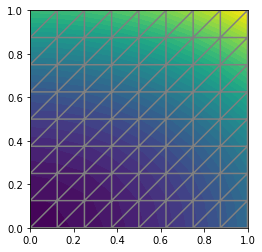

In [20]:
plot(u)
plot(mesh)
plt.show()

El comando <code>plot</code> es útil para depurar e iniciar investigaciones científicas. Las visualizaciones más avanzadas se crean mejor exportando la solución a un archivo y utilizando una herramienta de visualización avanzada como *ParaView*, como se explica en la siguiente sección.

El comando <code>plot</code> también acepta una serie de argumentos adicionales, como por ejemplo, la configuración del título de la ventana de trazado:

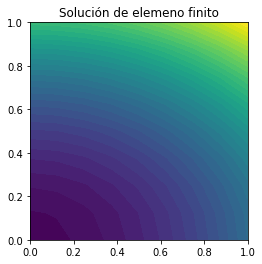

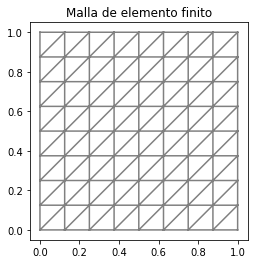

In [22]:
plot(u, title='Solución de elemeno finito')
plt.show()
plot(mesh, title='Malla de elemento finito')
plt.show()

Para obtener documentación detallada, ejecute el comando <code>help(plot)</code> en Python o <code>pydoc fenics.plot</code> desde una ventana de terminal. También puede utilizar la siguiente línea de código Python en un Notebook de Jupyter:

In [24]:
help(plot)

Help on function plot in module dolfin.common.plotting:

plot(object, *args, **kwargs)
    Plot given object.
    
    *Arguments*
        object
            a :py:class:`Mesh <dolfin.cpp.Mesh>`, a :py:class:`MeshFunction
            <dolfin.cpp.MeshFunction>`, a :py:class:`Function
            <dolfin.functions.function.Function>`, a :py:class:`Expression`
            <dolfin.cpp.Expression>, a :py:class:`DirichletBC`
            <dolfin.cpp.DirichletBC>, a :py:class:`FiniteElement
            <ufl.FiniteElement>`.
    
    *Examples of usage*
        In the simplest case, to plot only e.g. a mesh, simply use
    
        .. code-block:: python
    
            mesh = UnitSquare(4, 4)
            plot(mesh)
    
        Use the ``title`` argument to specify title of the plot
    
        .. code-block:: python
    
            plot(mesh, tite="Finite element mesh")
    
        It is also possible to plot an element
    
        .. code-block:: python
    
            element = Finite

<div class="alert alert alert-block alert-danger">
<b>Ploteo integrado en Mac OS X y en Docker</b>. El trazado incorporado en FEniCS puede no funcionar como se espera cuando se ejecuta en Mac OS X o cuando se ejecuta dentro de un contenedor Docker de FEniCS. FEniCS soporta el trazado usando el comando trazar en Mac OS X. Sin embargo, los atajos de teclado pueden no funcionar. Cuando se ejecuta dentro de un contenedor Docker, el trazado no es compatible, ya que Docker no interactúa con el sistema de ventanas. Para los usuarios de Docker que necesitan plotear, se recomienda trabajar con un portátil Jupyter/FEniCS (comando fenicsproject notebook) o confiar en ParaView u otras herramientas externas para la visualización.
</div>


## Trazado de la solución con ParaView
El simple comando dibujar es útil para visualizaciones rápidas, pero para visualizaciones más avanzadas se debe utilizar una herramienta externa. En esta sección demostramos cómo visualizar soluciones en ParaView. ParaView es una poderosa herramienta para visualizar campos escalares y vectoriales, incluyendo aquellos calculados por FEniCS.

El primer paso es exportar la solución en formato VTK:

In [23]:
vtkfile = File('poisson/solution.pvd')
vtkfile << u

Los siguientes pasos demuestran cómo crear un gráfico de la solución de nuestro problema de Poisson en ParaView. El gráfico resultante se muestra en la Figura 1.

1. Inicie la aplicación ParaView.
2. Haga clic en Abrir archivo... en el menú superior y navegue hasta el directorio que contiene la solución exportada. Esto debería estar dentro de un subdirectorio llamado poisson debajo del directorio donde se inició el programa Python de FEniCS. Seleccione el archivo llamado solution.pvd y haga clic en Aceptar.
3. Haga clic en Aplicar en el panel Propiedades a la izquierda. Esto traerá una trama de la solución.
4. Para hacer un gráfico 3D de la solución, utilizaremos uno de los muchos filtros de ParaView. Haga clic en Filters-Alphabetical-Warp By Scalar en el menú superior y luego en Aplicar en el panel Propiedades a la izquierda. Esto crea una superficie elevada con la altura determinada por el valor de la solución.
5. Para mostrar el trazado original debajo de la superficie elevada, haga clic en el pequeño icono de ojo a la izquierda de solution.pvd en el panel del navegador de tuberías a la izquierda. También haga clic en el pequeño botón 2D en la parte superior de la ventana del gráfico para cambiar la visualización a 3D. Esto le permite interactuar con el gráfico girando (botón izquierdo del ratón) y haciendo zoom (Ctrl + botón izquierdo del ratón).
6. Para mostrar la malla de elementos finitos, haga clic en solution.pvd en el navegador de tuberías, vaya a Representación en el panel Propiedades y seleccione Superficie con bordes. Esto debería hacer visible la malla de elementos finitos.
7. Para cambiar la relación de aspecto de la gráfica, haga clic en WarpByScalar1 en el Navegador de tuberías y navegue hasta Factor de escala en el panel Propiedades. Cambie el valor a 0.2 y haga clic en Aplicar. Esto cambiará la escala de la trama deformada. También desactivamos el botón Visibilidad del eje de orientación en la parte inferior del panel Propiedades para eliminar los pequeños ejes 3D en la esquina inferior izquierda de la ventana de la gráfica. Ahora debería ver algo que se parezca al gráfico de la Figura 1.
8. Finalmente, para exportar la visualización a un archivo, haga clic en File-Save Screenshot... y seleccione un nombre de archivo adecuado como poisson.png.

Para obtener más información, consulte la Guía ParaView[27] (disponible en formato PDF gratuito), el tutorial ParaView y el vídeo de instrucciones Introducción a ParaView.

<div style="">
<center>
Figura 1: Gráfico de la malla y la solución para el problema de Poisson creada con ParaView.

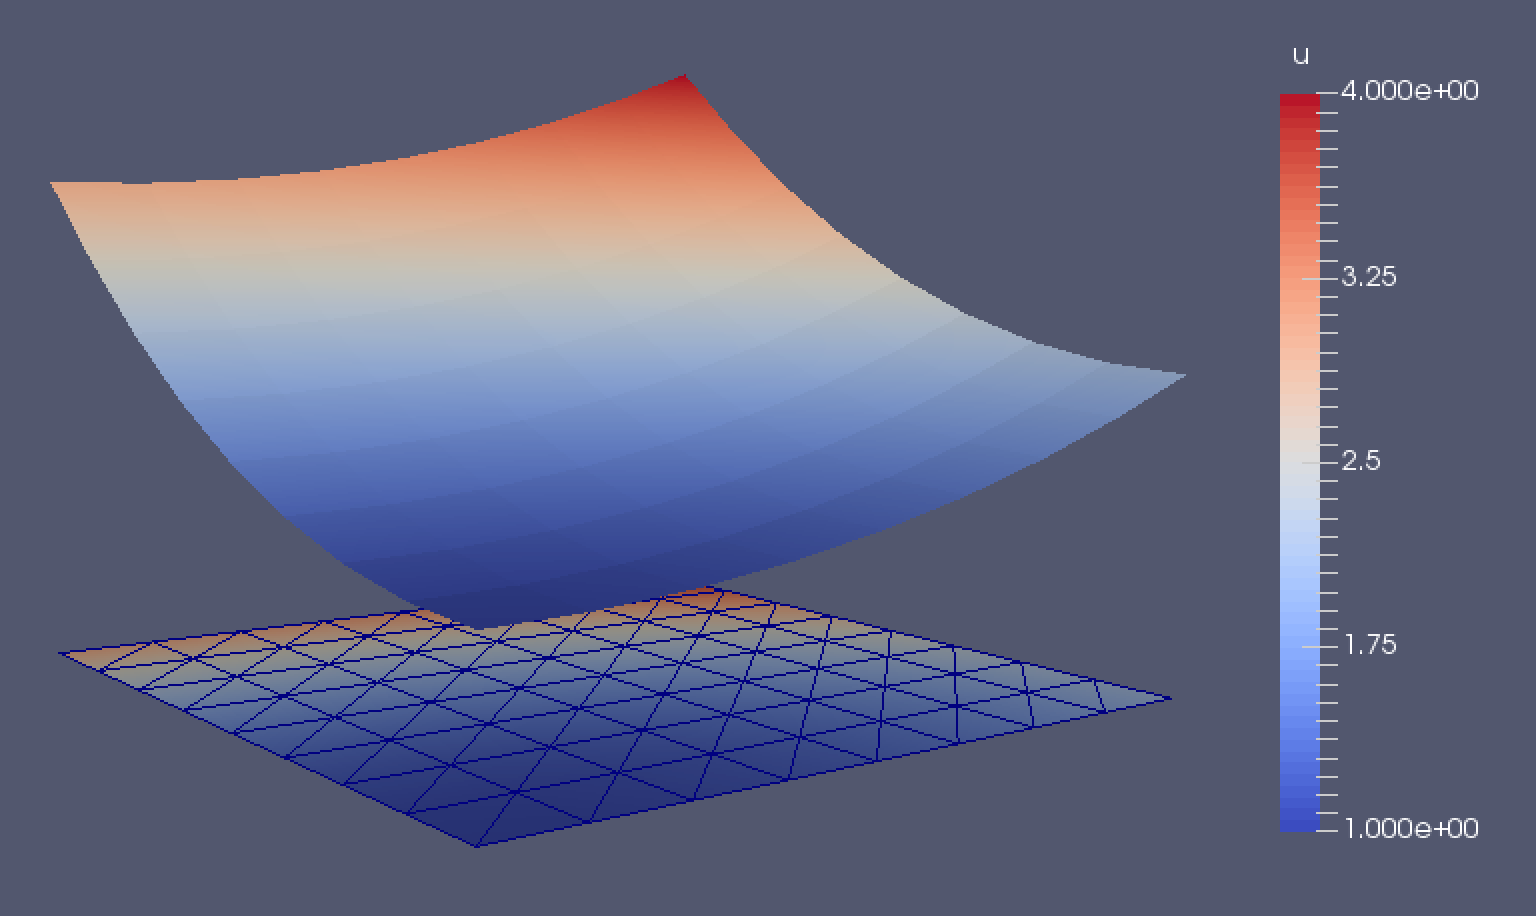

</center>
</div>

## Cálculo del error
Finalmente, calculamos el error para comprobar la precisión de la solución. Hacemos esto comparando la solución de elementos finitos $u$ con la solución exacta, que en este ejemplo resulta ser la misma que la expresión $u_D$ utilizada para establecer las condiciones de contorno. Calculamos el error de dos maneras diferentes. Primero, se calcula la norma $L^2$ del error, definida por:

$$
E = \sqrt{\int_\Omega (u_D - u)^2dx}
$$

Dado que la solución exacta es cuadrática y la solución de elementos finitos es lineal, este error será distinto de cero. Para calcular este error en FEniCS, simplemente escribimos:

In [25]:
error_L2 = errornorm(u_D, u, 'L2')

La función <code>errornorm</code> también puede calcular otras normas de error como la norma $H^1$. Escriba <code>pydoc fenics.errornorm</code> en una ventana de terminal, o <code>help(errornorm)</code> en un celda de Jupyter, para obtener más detalles.

También calculamos el valor máximo del error en todos los vértices de la malla de elementos finitos. Como se mencionó anteriormente, esperamos que este error sea cero dentro de la precisión máquina para este ejemplo en particular. Para calcular el error en los vértices, primero pedimos a FEniCS que calcule el valor de <code>u_D</code> y <code>u</code> en todos los vértices, y luego restar los resultados:

In [26]:
vertex_values_u_D = u_D.compute_vertex_values(mesh)
vertex_values_u = u.compute_vertex_values(mesh)
error_max = np.max(np.abs(vertex_values_u_D - vertex_values_u))

Aquí hemos usado las funciones de valor máximo y absoluto de numpy, porque son mucho más eficientes para arreglos grandes (un factor de 30) que las funciones <code>max</code> y <code>abs</code> incorporadas de Python.

<div class="alert alert alert-block alert-success">
<b>Cómo comprobar que el error desaparece</b>. Con la aritmética inexacta (coma flotante), el error máximo en los vértices no es cero, sino que debe ser un número pequeño. La precisión de máquina es de aproximadamente $10^{-16}$, pero en los cálculos de elementos finitos, pueden acumularse errores de redondeo de este tamaño, y producir un error mayor que $10^{-16}$. Los experimentos muestran que el aumento del número de elementos y el aumento del grado de los polinomios de elementos finitos aumenta el error. Para una malla con $2×(20×20)$ elementos cúbicos Lagrange (grado 3) el error es de $2⋅10^{-12}$, mientras que para 128 elementos lineales el error es de $2⋅10^{-15}$.
</div>

## Examinar los grados de libertad y los valores de vértices
Una función de elementos finitos como u se expresa como una combinación lineal de funciones básicas $ϕ_j$, que abarca el espacio $V:$

$$
\begin{equation}
u = \sum_{j=1}^N U_j \phi_j \tag{2.13}
\end{equation}
$$

Escribiendo <code>solve(a == L, u, bc)</code> en el programa, se formará un sistema lineal a partir de $a$ y $L$, y este sistema se resuelve para los valores $U1,....,UN$. Los valores $U1,....,UN$ se conocen como grados de libertad ("dofs") o valores nodales de $u$. Para los elementos de Lagrange (y muchos otros tipos de elementos) $U_j$ es simplemente el valor de $u$ en el nodo con el número global $j$. Las ubicaciones de los nodos y los vértices de las celdas coinciden para los elementos lineales de Lagrange, mientras que para los elementos de orden superior hay nodos adicionales asociados con las facetas, los bordes y, a veces, también el interior de las celdas.

Teniendo $u$ representado como un objeto <code>Function</code>, podemos evaluar $u(x)$ en cualquier punto $x$ de la malla (¡operación costosa!), o podemos tomar todos los grados de libertad en el vector $U$ directamente por:

In [27]:
nodal_values_u = u.vector()

El resultado es un objeto vectorial, que es básicamente una encapsulación del objeto vectorial utilizado en el paquete de álgebra lineal que se utiliza para resolver el sistema lineal que surge del problema de la variación. Como programamos en Python es conveniente convertir el objeto <code>Vector</code> en un <code>numpy.ndarray</code> numérico estándar para su posterior procesamiento, utilizando el método <code>get_local()</code>:

In [33]:
array_u = nodal_values_u.get_local()

Con `arrays` numpy podemos escribir código similar al de MATLAB para analizar los datos. La indexación se realiza con corchetes: `array_u[j]`, donde el índice `j` siempre comienza en `0`. Si la solución se calcula con elementos lineales de Lagrange (P1), entonces el tamaño de la matriz `array_u` es igual al número de vértices, y cada `array_u[j]` es el valor en algún vértice de la malla. Sin embargo, los grados de libertad no están necesariamente numerados de la misma manera que los vértices de la malla. (Esto se discute en detalle en la sección "Examinar los grados de libertad"). Por lo tanto, si queremos conocer los valores en los vértices, necesitamos llamar a la función `u.compute_vertex_values`. Esta función devuelve los valores en todos los vértices de la malla como una matriz numérica con la misma numeración que para los vértices de la malla, por ejemplo:

In [35]:
vertex_values_u = u.compute_vertex_values()

Tenga en cuenta que para los elementos $P_1$, las matrices `array_u` y `vertex_values_u` tienen las mismas longitudes y contienen los mismos valores, aunque en orden diferente.